# ELG 5255 Applied Machine Learning Summer 2021
# Assignment 1 (MulticlassClassification)

## **By Group 31 :**


*   Abdelrahman Othman
*   Heba Hassan
*   Aliaa Ahmed







> This assignment aims to implement One-versus-Rest (OvR) strategy
transforming multiclass classification problems to multiple binary
classification problems.
# Dataset
During this assignment, the well-known Iris flower dataset is used to
test OvR strategy.

>Iris dataset contains 150 samples, 4 features (i.e., sepal length, sepal
width, petal length, petal width), and 3 classes (i.e., Iris-Setosa,
Iris-Versicolour, Iris-Virginica). In order to plot and have a better
understanding about the dataset, the first 2 features would be dropped
(i.e., sepal length and sepal width).
Before building OvR, the performance of binary classification models
(Logistic Regression (LR) and Support Vector Machine (SVM)) should be
compared;   **hence, the first class (Iris-Setosa) should be dropped to form a binary class datasett**

## One-versus-Rest
OvR involves training a binary class classifier for each class. During
testing process, each classifier will predict the confidence of each
class and OvR will select the one with highest confidence.

## What You Need to Do and Implement
Please note the difference among Iris dataset (with 4 features and 3
classes), 2D Iris dataset (with 2 features and 3 classes). Please do NOT
separate the dataset to training and testing set. Don't use testing or
validation set. Please only use training set.

>Please submit your code and report (including screen shot of code and the
relevant figures).
1. Load the Iris dataset
2. Drop the sepal length and sepal width features to form a 2D Iris
dataset 
3. Build OvR-LR and OvR-SVM and test on 2D Iris dataset (which contains
3 classes). For each class: 



                      1. Obtain the binarized label (1 for positive class
                      -1 for negative class)
                      2. Obtain the LR's confusion matrix and accuracy 
                      3. Obtain the SVM's confusion matrix and accuracy
                      4. Plot LR's decision boundary 
                      5. Plot SVM's decision boundary 
                     


4. Use argmax to aggregate confidence scores and obtain the final label
and obtain the performance (i.e., confusion matrix, accuracy,
plotting correct and wrong prediction points) of OvR-LR 
and OvR-SVM 
5. Implement alternative aggregation strategy instead of existing
argmax function based OvR, using the third step's results  , obtain the performance (i.e., confusion matrix, accuracy,
plotting correct and wrong prediction points) of your own strategy,


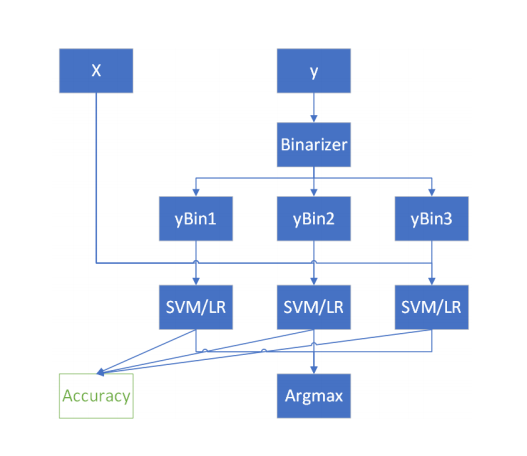

# Import libraries and build functions

In [41]:
#Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


#Function to Load Dataset (Iris dataset)
def loadDataset():
 dataset = datasets.load_iris() 
 features = dataset.data
 labels = dataset.target
 return dataset, features, labels

In [42]:
#Function to remove class to plot one to one
def prepareDataset (X, y, cls_remove=None):
  cls = [0, 1, 2]

  if cls_remove is not None:
     features = []
     labels = []
     for index, (feat, label) in enumerate(zip(X, y)):
        if y[index] != cls_remove:
          features.append(feat)
          labels.append(label)
     cls.pop(cls_remove)
  else:
    features = X
    labels = y

  
  return np.array(features)[:, 2:4], np.array(labels), cls

In [43]:
def label_binary(labels, pos_cls):
  y=np.copy(labels)
  if pos_cls == 0 :
    y=map(lambda x : 1 if x == 0 else -1,labels)
    y=np.fromiter(y, dtype=np.int)
  elif pos_cls == 1 :
    y=map(lambda x : 1 if x == 1 else -1,labels)
    y=np.fromiter(y, dtype=np.int)
  else:
    y=map(lambda x : 1 if x == 2 else -1,labels)
    y=np.fromiter(y, dtype=np.int)
  return y 


In [44]:
#Function to Plot Data
def plotData(features, labels, cls, class_names):
 colors = ['r', 'b', 'g']
 markers = ['o', '*', '+']
 for class_index in range(len(cls)):
   plt.scatter(features[labels == cls[class_index], 0], features[labels ==cls[class_index], 1], c=colors[class_index], marker=markers[class_index],label=class_names[cls[class_index]])
 Title = "Iris Dataset with {n} classes" .format(n=int(len(cls)))
 plt.title(Title)
 plt.xlabel('Petal Length (cm)' )
 plt.ylabel('Petal width (cm)' )
 plt.legend()

In [45]:
#Function to Plot Decision Boundary
def plotRegions(model):
 ax = plt.gca()
 xlim = ax.get_xlim()
 ylim = ax.get_ylim()
 xx = np.linspace(xlim[ 0], xlim[1], 50)
 yy = np.linspace(ylim[ 0], ylim[1], 50)
 XX, YY = np.meshgrid(xx, yy)
 z = np.vstack([XX.ravel(), YY.ravel()]).T
 ZZ = model.decision_function(z) .reshape(XX.shape)
 ax.contourf(XX, YY, ZZ, colors=[ 'c','y'], levels=0, alpha=0.2)

In [46]:
#Additional Functions
def getAccuracy(model, x, y):
 return model.score(x,y)* 100

def getClassNames (target_names):
 cls_all = {}
 for i, label in enumerate(target_names):
   cls_all[i] = label
 return cls_all

In [47]:
dataset, features, labels = loadDataset()
class_names = getClassNames(dataset.target_names)
print('Class names=', class_names)
X, Y, cls_new = prepareDataset(features, labels, cls_remove=None)
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])
print(cls_new)


Class names= {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
Number of samples: 150
Number of features: 2
[0, 1, 2]


# SVM

>Here will train 3 OvR SVM models and plot the result.
- 1st will make 1st class label 1 and the rest classes' labels -1.
- 2nd one will make 2nd class label 1 and the rest classes' labels -1.
- 3rd one will make 3rd class label 1 and the rest classes' labels -1.


In [48]:
#training svm model by making class 1 label is 1 and the rest label is -1.
y1 = label_binary(Y,pos_cls=0)
cls1Svm = svm.SVC(probability=True)
cls1Svm.fit(X, y1)

#training svm model by making class 2 label is 1 and the rest label is -1.
y2 = label_binary(Y,pos_cls=1)
cls2Svm = svm.SVC(probability=True)
cls2Svm.fit(X, y2)

#training svm model by making class 3 label is 1 and the rest label is -1.
y3 = label_binary(Y,pos_cls=2)
cls3Svm = svm.SVC(probability=True)
cls3Svm.fit(X, y3)

C:\Users\aothm031\AppData\Local\Temp/ipykernel_2140/1866187985.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y=np.fromiter(y, dtype=np.int)
C:\Users\aothm031\AppData\Local\Temp/ipykernel_2140/1866187985.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note 

SVC(probability=True)

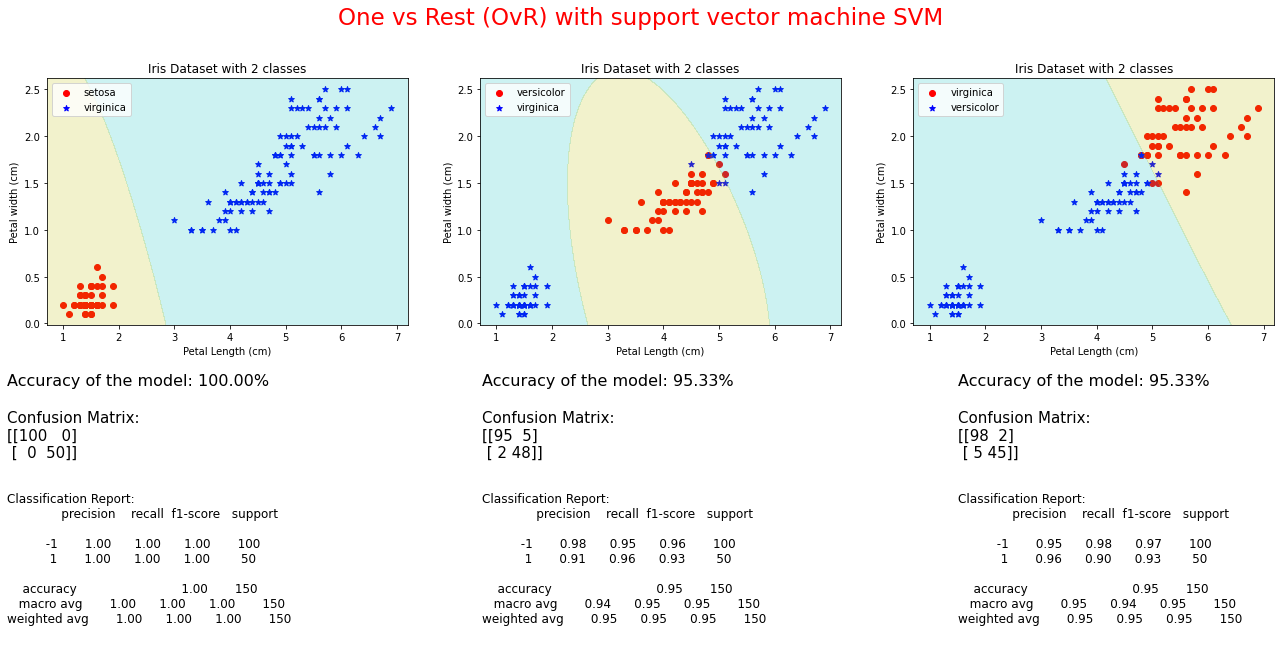

In [49]:
#SVM and Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 10))
fig.suptitle('One vs Rest (OvR) with support vector machine SVM',size=23,c='r')


#plot 1:
plt.subplot(2, 3, 1)
plotData(X, y1, [1,-1], {1:'setosa', -1: 'versicolor', -1: 'virginica'})
plotRegions(cls1Svm)
#Stats1
y_true, y_pred = y1, cls1Svm.predict(X)
txt1='Accuracy of the model: {:.2f}%' .format(getAccuracy(cls1Svm, X, y1))
fig.text(.1, .45, txt1, horizontalalignment='left',verticalalignment='bottom',size=16)
txt11='\nConfusion Matrix:\n{}'.format(confusion_matrix(y1, y_pred))
fig.text(.1, .35, txt11, horizontalalignment='left',verticalalignment='bottom',size=15)
txt10='\nClassification Report:\n{}'.format(classification_report(y_true, y_pred))
fig.text(.1, .1, txt10, horizontalalignment='left',verticalalignment='bottom',size=12)


#plot 2:
plt.subplot(2, 3, 2)
plotData(X, y2, [1,-1], {-1: 'setosa', 1: 'versicolor', -1: 'virginica'})
plotRegions(cls2Svm)
#Stats2
y_true, y_pred = y2, cls2Svm.predict(X)
txt1='Accuracy of the model: {:.2f}%' .format(getAccuracy(cls2Svm, X, y2))
fig.text(.4, .45, txt1, horizontalalignment='left',verticalalignment='bottom',size=16)
txt11='\nConfusion Matrix:\n{}'.format(confusion_matrix(y2, y_pred))
fig.text(.4, .35, txt11, horizontalalignment='left',verticalalignment='bottom',size=15)
txt10='\nClassification Report:\n{}'.format(classification_report(y_true, y_pred))
fig.text(.4, .1, txt10, horizontalalignment='left',verticalalignment='bottom',size=12)


#plot3
plt.subplot(2, 3, 3)
plotData(X, y3, [1,-1], {-1: 'setosa', -1: 'versicolor', 1: 'virginica'})
plotRegions(cls3Svm)
#Stats3
y_true, y_pred = y3, cls3Svm.predict(X)
txt1='Accuracy of the model: {:.2f}%' .format(getAccuracy(cls3Svm, X, y3))
fig.text(.7, .45, txt1, horizontalalignment='left',verticalalignment='bottom',size=16)
txt11='\nConfusion Matrix:\n{}'.format(confusion_matrix(y3, y_pred))
fig.text(.7, .35, txt11, horizontalalignment='left',verticalalignment='bottom',size=15)
txt10='\nClassification Report:\n{}'.format(classification_report(y_true, y_pred))
fig.text(.7, .1, txt10, horizontalalignment='left',verticalalignment='bottom',size=12)


plt.show()

# Logistic Regression


>Here will train 3 OvR LR(Logistic Regression) models and plot the result.
- 1st will make 1st class label 1 and the rest classes' labels -1.
- 2nd one will make 2nd class label 1 and the rest classes' labels -1.
- 3rd one will make 3rd class label 1 and the rest classes' labels -1.

In [50]:
#Training LogisticRegression model by making class 1 label is 1 and the rest label is -1.
y1 = label_binary(Y,pos_cls=0)
cls1LR = LogisticRegression()
cls1LR.fit(X, y1)

#Training LogisticRegression model by making class 2 label is 1 and the rest label is -1.
y2 = label_binary(Y,pos_cls=1)
cls2LR = LogisticRegression()
cls2LR.fit(X, y2)

#Training LogisticRegression model by making class 3 label is 1 and the rest label is -1.
y3 = label_binary(Y,pos_cls=2)
cls3LR = LogisticRegression()
cls3LR.fit(X, y3)

C:\Users\aothm031\AppData\Local\Temp/ipykernel_2140/1866187985.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y=np.fromiter(y, dtype=np.int)
C:\Users\aothm031\AppData\Local\Temp/ipykernel_2140/1866187985.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note 

LogisticRegression()

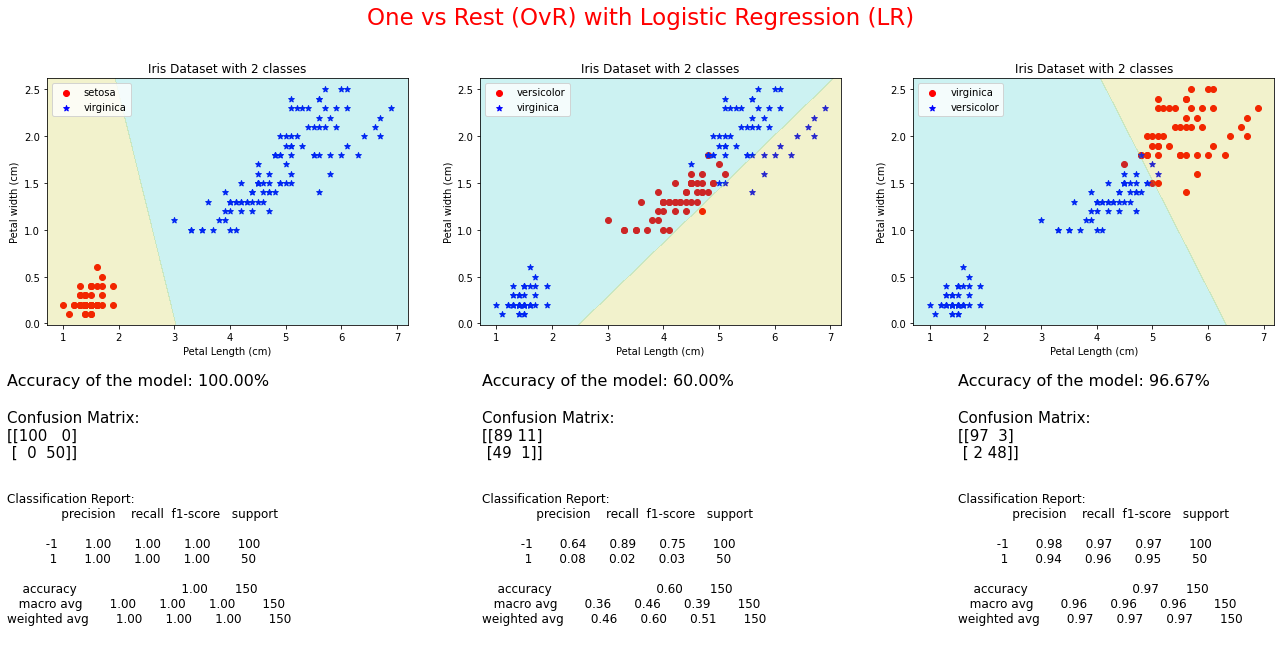

In [51]:
#SVM and Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 10))
fig.suptitle('One vs Rest (OvR) with Logistic Regression (LR)',size=23,c='r')


#plot 1:
plt.subplot(2, 3, 1)
#a=getAccuracy(cls1LR, X, y)
plotData(X, y1, [1,-1], {1:'setosa', -1: 'versicolor', -1: 'virginica'})
plotRegions(cls1LR)
#Stats1
y_true, y_pred = y1, cls1LR.predict(X)
txt1='Accuracy of the model: {:.2f}%' .format(getAccuracy(cls1LR, X, y1))
fig.text(.1, .45, txt1, horizontalalignment='left',verticalalignment='bottom',size=16)
txt11='\nConfusion Matrix:\n{}'.format(confusion_matrix(y1, y_pred))
fig.text(.1, .35, txt11, horizontalalignment='left',verticalalignment='bottom',size=15)
txt10='\nClassification Report:\n{}'.format(classification_report(y_true, y_pred))
fig.text(.1, .1, txt10, horizontalalignment='left',verticalalignment='bottom',size=12)


#plot 2:
plt.subplot(2, 3, 2)
plotData(X, y2, [1,-1], {-1: 'setosa', 1: 'versicolor', -1: 'virginica'})
plotRegions(cls2LR)
#Stats2
y_true, y_pred = y2, cls2LR.predict(X)
txt1='Accuracy of the model: {:.2f}%' .format(getAccuracy(cls2LR, X, y2))
fig.text(.4, .45, txt1, horizontalalignment='left',verticalalignment='bottom',size=16)
txt11='\nConfusion Matrix:\n{}'.format(confusion_matrix(y2, y_pred))
fig.text(.4, .35, txt11, horizontalalignment='left',verticalalignment='bottom',size=15)
txt10='\nClassification Report:\n{}'.format(classification_report(y_true, y_pred))
fig.text(.4, .1, txt10, horizontalalignment='left',verticalalignment='bottom',size=12)


#plot3
plt.subplot(2, 3, 3)
plotData(X, y3, [1,-1], {-1: 'setosa', -1: 'versicolor', 1: 'virginica'})
plotRegions(cls3LR)
#Stats3
y_true, y_pred = y3, cls3LR.predict(X)
txt1='Accuracy of the model: {:.2f}%' .format(getAccuracy(cls3LR, X, y3))
fig.text(.7, .45, txt1, horizontalalignment='left',verticalalignment='bottom',size=16)
txt11='\nConfusion Matrix:\n{}'.format(confusion_matrix(y3, y_pred))
fig.text(.7, .35, txt11, horizontalalignment='left',verticalalignment='bottom',size=15)
txt10='\nClassification Report:\n{}'.format(classification_report(y_true, y_pred))
fig.text(.7, .1, txt10, horizontalalignment='left',verticalalignment='bottom',size=12)


plt.show()

# ArgMax

## Aggregate SVM (ArgMax)
>Using Argmax to aggregate confidence scores and obtain the final label and obtain the performance (i.e., confusion matrix, accuracy, plotting correct and wrong prediction points) of the 3 OvR-SVM models to get one OvR-SVM result.

In [52]:
#Applying argmax on the probabilty of the 3 svm models prediction
predictions = np.argmax([cls1Svm.predict_proba(X)[:,1],cls2Svm.predict_proba(X)[:,1],cls3Svm.predict_proba(X)[:,1]], axis=0)

#Showing were is the wrong prediction
svm_y= np.copy(labels)
i=-1
for input, prediction, label in zip(X, predictions, labels):
  i+=1
  if prediction != label:
    svm_y[i]=3
    h= np.stack(input)
    print(h, 'has been classified as ', prediction, 'and should be ', label) 

[4.8 1.8] has been classified as  2 and should be  1
[5.  1.7] has been classified as  2 and should be  1
[5.1 1.6] has been classified as  2 and should be  1
[4.5 1.7] has been classified as  1 and should be  2
[5.  1.5] has been classified as  1 and should be  2


ref : https://stackoverflow.com/questions/45176469/can-i-get-a-list-of-wrong-predictions-in-scikit-learn

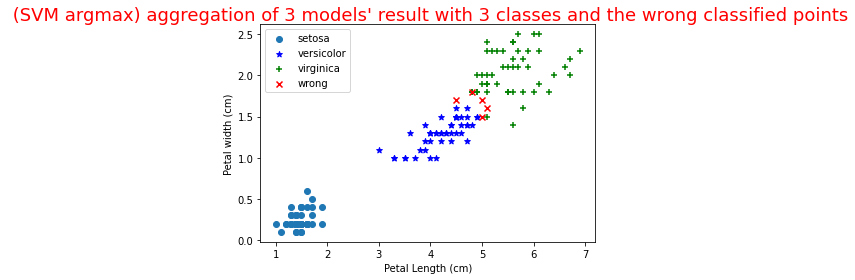


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


Confusion Matrix:

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


In [53]:
features=X
lab=svm_y
cls=[0,1,2,3]
class_names={0: 'setosa', 1: 'versicolor', 2: 'virginica',3:'wrong'}

colors = ['#1f77b4', 'b', 'g','r']
markers = ['o', '*', '+','x']
for class_index in range(len(cls)):
  plt.scatter(features[lab == cls[class_index], 0], 
              features[lab == cls[class_index], 1],
              c=colors[class_index], marker=markers[class_index],label=class_names[cls[class_index]])


Title = " (SVM argmax) aggregation of 3 models' result with {n} classes and the wrong classified points" .format(n=int(len(cls)-1))
plt.title(Title,c='r',size=18,verticalalignment= 'center',horizontalalignment='center')
plt.xlabel('Petal Length (cm)' )
plt.ylabel('Petal width (cm)' )
plt.legend()
plt.show()

y_true, y_pred = labels, predictions
print('\nClassification Report:\n' )
print(classification_report(y_true, y_pred))
print('\nConfusion Matrix:\n' )
print(confusion_matrix(labels, y_pred))

##Aggregate LR (ArgMax)
>Use argmax to aggregate confidence scores and obtain the final label and obtain the performance (i.e., confusion matrix, accuracy, plotting correct and wrong prediction points) of the 3 OvR-LR models to get one OvR-LR result.

In [54]:
#Applying argmax on the probabilty of the 3 lr models prediction
predicted_lr= np.argmax([cls1LR.predict_proba(X)[:,1],cls2LR.predict_proba(X)[:,1],cls3LR.predict_proba(X)[:,1]], axis=0)

In [55]:
#Showing were is the wrong prediction
predictions = predicted_lr
lr_y= np.copy(labels)
i=-1
for input, prediction, label in zip(X, predictions, labels):
  i+=1
  if prediction != label:
    lr_y[i]=3
    h= np.stack(input)
    print(h, 'has been classified as ', prediction, 'and should be ', label) 

[4.8 1.8] has been classified as  2 and should be  1
[5.  1.7] has been classified as  2 and should be  1
[5.1 1.6] has been classified as  2 and should be  1
[3.  1.1] has been classified as  0 and should be  1
[4.5 1.7] has been classified as  1 and should be  2


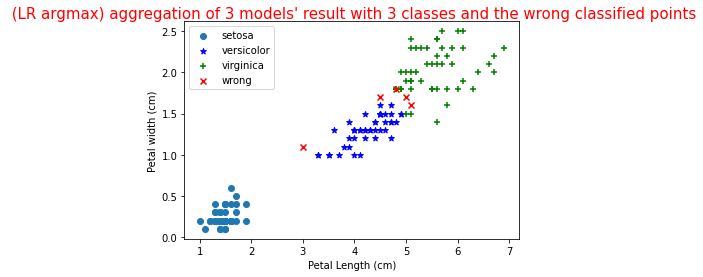


Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       0.98      0.92      0.95        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


Confusion Matrix:

[[50  0  0]
 [ 1 46  3]
 [ 0  1 49]]


In [56]:
#Ploting the data and show where is the wrong prediction
features=X
lab=lr_y
cls=[0,1,2,3]
class_names={0: 'setosa', 1: 'versicolor', 2: 'virginica',3:'wrong'}

colors = ['#1f77b4', 'b', 'g','r']
markers = ['o', '*', '+','x']
for class_index in range(len(cls)):
  plt.scatter(features[lab == cls[class_index], 0], 
              features[lab == cls[class_index], 1],
              c=colors[class_index], marker=markers[class_index],label=class_names[cls[class_index]])


Title = " (LR argmax) aggregation of 3 models' result with {n} classes and the wrong classified points" .format(n=int(len(cls)-1))
plt.title(Title,c='r',size=15,verticalalignment= 'center',horizontalalignment='center')
plt.xlabel('Petal Length (cm)' )
plt.ylabel('Petal width (cm)' )
plt.legend()
plt.show()

y_true, y_pred = labels, predicted_lr
print('\nClassification Report:\n' )
print(classification_report(y_true, y_pred))
print('\nConfusion Matrix:\n' )
print(confusion_matrix(labels, y_pred))

# 5. Implement alternative aggregation strategy

## Aggregate SVM (Gradient-Boosting-Classifier)



>Using Gradient-Boosting-Classifier to aggregate confidence scores and obtain the final label and obtain the performance (i.e., confusion matrix, accuracy, plotting correct and wrong prediction points) of the 3 OvR-SVM models to get one OvR-SVM result.

In [57]:
#Prepare the data of the result of 3 svm models
df = pd.DataFrame(data={'m1':cls1Svm.predict_proba(X)[:,1],
                        'm2':cls2Svm.predict_proba(X)[:,1],
                        'm3':cls3Svm.predict_proba(X)[:,1],
                        'labels':labels})
y_train =df['labels']
X_train = df.drop('labels', axis=1)

#Triaining GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
clf_svm = GradientBoostingClassifier().fit(X_train, y_train)
clf_svm.score(X_train, y_train)

0.9933333333333333

In [58]:
#Result of prediction
clf_y=clf_svm.predict(X_train)
clf_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [59]:
#Showing were is the wrong prediction
predictions = clf_y
i=-1
for input, prediction, label in zip(X, predictions, labels):
  i+=1
  if prediction != label:
    clf_y[i]=3
    h= np.stack(input)
    print(h, 'has been classified as ', prediction, 'and should be ', label) 

[4.8 1.8] has been classified as  2 and should be  1


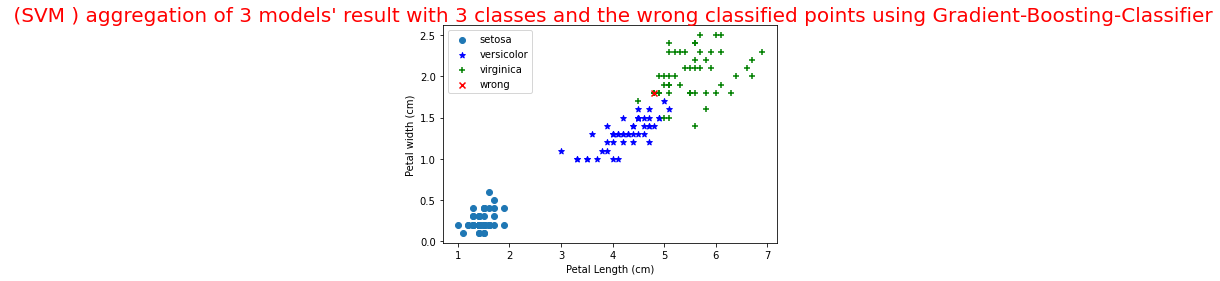


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       1.00      1.00      1.00        50
           3       0.00      1.00      0.00         0

    accuracy                           0.99       150
   macro avg       0.75      0.99      0.75       150
weighted avg       1.00      0.99      1.00       150


Confusion Matrix:

[[50  0  0  0]
 [ 0 49  0  1]
 [ 0  0 50  0]
 [ 0  0  0  0]]


In [60]:
#Ploting the data and show where is the wrong prediction
features=X
lab=clf_y
cls=[0,1,2,3]
class_names={0: 'setosa', 1: 'versicolor', 2: 'virginica',3:'wrong'}

colors = ['#1f77b4', 'b', 'g','r']
markers = ['o', '*', '+','x']
for class_index in range(len(cls)):
  plt.scatter(features[lab == cls[class_index], 0], 
              features[lab == cls[class_index], 1],
              c=colors[class_index], marker=markers[class_index],label=class_names[cls[class_index]])


Title = " (SVM ) aggregation of 3 models' result with {n} classes and the wrong classified points using Gradient-Boosting-Classifier" .format(n=int(len(cls)-1))
plt.title(Title,c='r',size=20,verticalalignment= 'center',horizontalalignment='center')
plt.xlabel('Petal Length (cm)' )
plt.ylabel('Petal width (cm)' )
plt.legend()
plt.show()

y_true, y_pred = labels, clf_y
print('\nClassification Report:\n' )
print(classification_report(y_true, y_pred,zero_division=1))
print('\nConfusion Matrix:\n' )
print(confusion_matrix(labels, y_pred))

## Aggregate LR (Gradient-Boosting-Classifier)
>

>Using Gradient-Boosting-Classifier to aggregate confidence scores and obtain the final label and obtain the performance (i.e., confusion matrix, accuracy, plotting correct and wrong prediction points) of the 3 OvR-LR models to get one OvR-LR result.

In [61]:
#Prepare the data of the result of 3 lr models
df = pd.DataFrame(data={'m1':cls1LR.predict_proba(X)[:,1],
                        'm2':cls2LR.predict_proba(X)[:,1],
                        'm3':cls3LR.predict_proba(X)[:,1],
                        'labels':labels})
y_train =df['labels']
X_train = df.drop('labels', axis=1)

#Triaining GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
clf_lr = GradientBoostingClassifier().fit(X_train, y_train)
clf_lr.score(X_train, y_train)

0.9933333333333333

In [62]:
#Result of prediction
clf_y=clf_lr.predict(X_train)
clf_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [63]:
#Showing were is the wrong prediction
predictions = clf_y
i=-1
for input, prediction, label in zip(X, predictions, labels):
  i+=1
  if prediction != label:
    clf_y[i]=3
    h= np.stack(input)
    print(h, 'has been classified as ', prediction, 'and should be ', label) 

[4.8 1.8] has been classified as  2 and should be  1


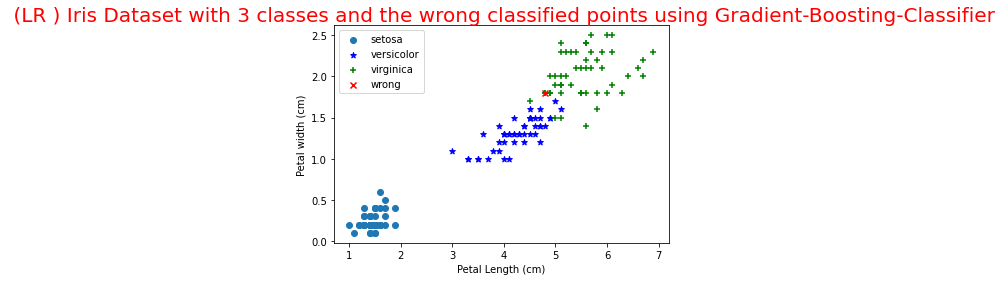


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       1.00      1.00      1.00        50
           3       0.00      1.00      0.00         0

    accuracy                           0.99       150
   macro avg       0.75      0.99      0.75       150
weighted avg       1.00      0.99      1.00       150


Confusion Matrix:

[[50  0  0  0]
 [ 0 49  0  1]
 [ 0  0 50  0]
 [ 0  0  0  0]]


In [70]:
#Ploting the data and show where is the wrong prediction
features=X
lab=clf_y
cls=[0,1,2,3]
class_names={0: 'setosa', 1: 'versicolor', 2: 'virginica',3:'wrong'}

colors = ['#1f77b4', 'b', 'g','r']
markers = ['o', '*', '+','x']
for class_index in range(len(cls)):
  plt.scatter(features[lab == cls[class_index], 0], 
              features[lab == cls[class_index], 1],
              c=colors[class_index], marker=markers[class_index],label=class_names[cls[class_index]])


Title = " (LR ) Iris Dataset with {n} classes and the wrong classified points using Gradient-Boosting-Classifier" .format(n=int(len(cls)-1))
plt.title(Title,c='r',size=20,verticalalignment= 'center',horizontalalignment='center')
plt.xlabel('Petal Length (cm)' )
plt.ylabel('Petal width (cm)' )
plt.legend()
plt.show()

y_true, y_pred = labels, clf_y
print('\nClassification Report:\n' )
print(classification_report(y_true, y_pred,zero_division=1))
print('\nConfusion Matrix:\n' )
print(confusion_matrix(labels, y_pred))

>Using **GradientBoostingClassifier** to aggregate models predictions instead of using **ArgMax**.
>As we see that using **GradientBoostingClassifie**r we get more accurate predictions.

# Extra : Implement alternative algorithm for OvR directly

>Training OvR Gradient-Boosting-Classifier dirctly on the data.

In [65]:
#Training Gradient-Boosting-Classifier
from sklearn.ensemble import GradientBoostingClassifier
clr_ovr = GradientBoostingClassifier().fit(X, labels)
clr_ovr.score(X, labels)

0.9933333333333333

In [66]:
#Result of prediction
clf_y=clr_ovr.predict(X)
clf_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [67]:
#Showing were is the wrong prediction
predictions = clf_y
clf_y= np.copy(labels)
i=-1
for input, prediction, label in zip(X, predictions, labels):
  i+=1
  if prediction != label:
    clf_y[i]=3
    h= np.stack(input)
    print(h, 'has been classified as ', prediction, 'and should be ', label) 

[4.8 1.8] has been classified as  2 and should be  1


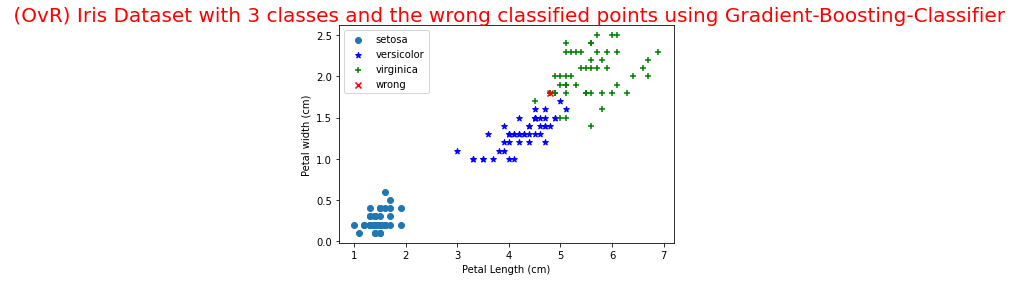


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       1.00      1.00      1.00        50
           3       0.00      1.00      0.00         0

    accuracy                           0.99       150
   macro avg       0.75      0.99      0.75       150
weighted avg       1.00      0.99      1.00       150


Confusion Matrix:

[[50  0  0  0]
 [ 0 49  0  1]
 [ 0  0 50  0]
 [ 0  0  0  0]]


In [69]:
#Ploting the data and show where is the wrong prediction
features=X
lab=clf_y
cls=[0,1,2,3]
class_names={0: 'setosa', 1: 'versicolor', 2: 'virginica',3:'wrong'}

colors = ['#1f77b4', 'b', 'g','r']
markers = ['o', '*', '+','x']
for class_index in range(len(cls)):
  plt.scatter(features[lab == cls[class_index], 0], 
              features[lab == cls[class_index], 1],
              c=colors[class_index], marker=markers[class_index],label=class_names[cls[class_index]])


Title = " (OvR) Iris Dataset with {n} classes and the wrong classified points using Gradient-Boosting-Classifier" .format(n=int(len(cls)-1))
plt.title(Title,c='r',size=20,verticalalignment= 'center',horizontalalignment='center')
plt.xlabel('Petal Length (cm)' )
plt.ylabel('Petal width (cm)' )
plt.legend()
plt.show()

y_true, y_pred = labels, clf_y
print('\nClassification Report:\n' )
print(classification_report(y_true, y_pred,zero_division=1))
print('\nConfusion Matrix:\n' )
print(confusion_matrix(labels, y_pred))

As we see the result of Aggregating three models result (svm or lr) using **Gradient-Boosting-Classifier** gives the same result(with the same accuracy) of training the data set directly.